In [32]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
rounds = 50
vehicle_limit = 80
all_routes = [[0, 1], [2, 3]]

In [34]:
record = pd.read_csv(f'Saved_SM/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_SM/Utility_data/Round_{rounds}.csv')

In [35]:
record

,Vehicle_label,Road_order,Total_time,Leading_vehicles,Stopped_time,Stop_while_front,Round_number
0,0,"[2, 3]",67.75,"[-999, -999]","[0, 0]","[0, 0]",1
1,1,"[2, 3]",70.85,"[0, 0]","[0, 0]","[0, 0]",1
2,2,"[2, 3]",72.70,"[1, 1]","[0, 0]","[0, 0]",1
3,3,"[2, 3]",74.30,"[2, 2]","[0, 0]","[0, 0]",1
4,4,"[2, 3]",75.70,"[3, 3]","[0, 0]","[0, 0]",1
...,...,...,...,...,...,...,...
3995,75,"[2, 3]",122.90,"[72, 72]","[0, 0]","[0, 0]",50
3996,76,"[0, 1]",114.65,"[74, 74]","[0, 0]","[0, 0]",50
3997,77,"[0, 1]",115.70,"[76, 76]","[0, 0]","[0, 0]",50
3998,78,"[0, 1]",116.75,"[77, 77]","[0, 0]","[0, 0]",50


In [36]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

In [37]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(route_df.shape)
# display(route_df.head(10))

In [38]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
# time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

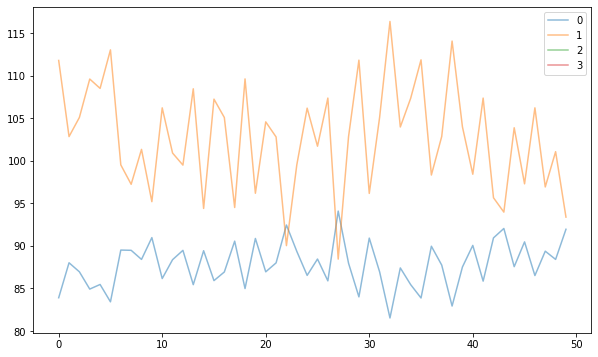

In [39]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(2):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

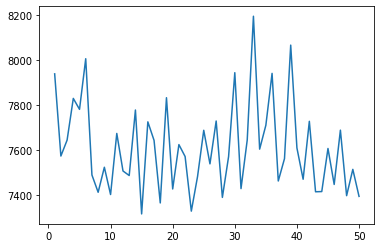

In [40]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [55]:
time_df2.Total_time.mean()

7611.535999999763

In [42]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [43]:
len(utility.Routes_taken[0])

150

In [44]:
utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,1,1
1,1,0,0,1,0,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0
2,1,0,1,1,0,1,0,0,1,0,...,0,1,0,1,1,1,1,0,0,0
3,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0,0,0,1,1,1,1,0,...,0,1,0,0,0,0,0,1,0,1
5,0,1,1,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,1,1
6,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,0,1,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
8,0,1,1,0,1,1,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
9,1,0,0,1,1,0,0,0,0,1,...,1,1,1,0,1,0,0,0,1,1


In [45]:
# for r in range(1, rounds+1):
#     df = pd.read_csv(f'Saved_SM/Utility_data/Round_{r}.csv')
#     df['Routes_taken'] = df.apply(lambda row: ast.literal_eval(row['Routes_taken'])[1:], axis=1)
#     df.to_csv(f'Saved_SM/Utility_data/Round_{r}.csv')

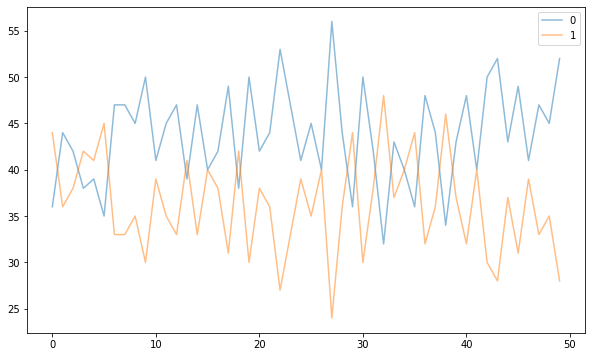

In [46]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(2):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

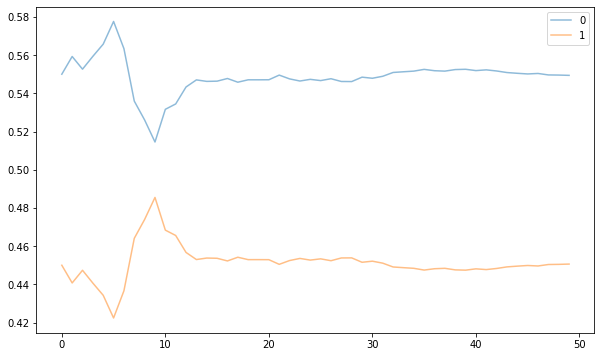

In [47]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_SM/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(2):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(2))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [48]:
utility

,Unnamed: 0,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,0,"[-4.727356330843291, -4.733297385284927]","[0.5014852592417532, 0.4985147407582467]","[1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...",1.221444,1.031086
1,1,1,"[-4.475110741947691, -4.4877075436058895]","[0.5031491587724379, 0.49685084122756207]","[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, ...",1.005148,1.026035
2,2,2,"[-4.062563941239126, -4.076308684334343]","[0.5034361316783916, 0.49656386832160837]","[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...",1.119700,0.967461
3,3,3,"[-5.285052426361108, -5.313558046260541]","[0.5071259224552748, 0.4928740775447251]","[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, ...",0.906961,1.110598
4,4,4,"[-4.887125943393305, -4.918317347253559]","[0.5077972188134109, 0.49220278118658917]","[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...",1.180157,1.043941
...,...,...,...,...,...,...,...
75,75,75,"[-3.010101758108122, -3.098948671023112]","[0.5221971285565126, 0.47780287144348743]","[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, ...",1.110890,0.787496
76,76,76,"[-2.8716707696602963, -2.9536030937250306]","[0.520471630286901, 0.479528369713099]","[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ...",1.009792,0.770654
77,77,77,"[-2.4122747126864996, -2.476909640636905]","[0.5161531088440005, 0.4838468911559995]","[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...",0.766593,0.691094
78,78,78,"[-2.891759561979051, -2.980765731273093]","[0.5222368640431142, 0.4777631359568858]","[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, ...",1.005447,0.772958


In [49]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [50]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(2):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(2))[i].values

In [51]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [52]:
# len(utility.Eta.values), len(plot_eta_prob[1])

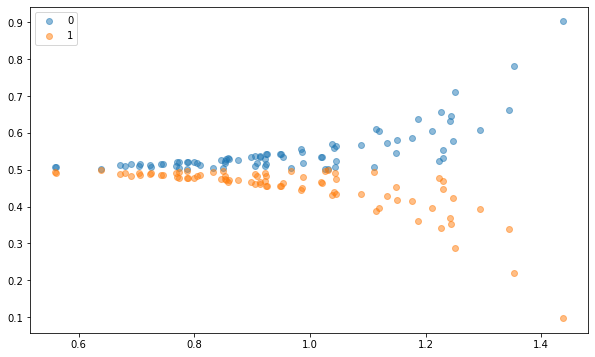

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

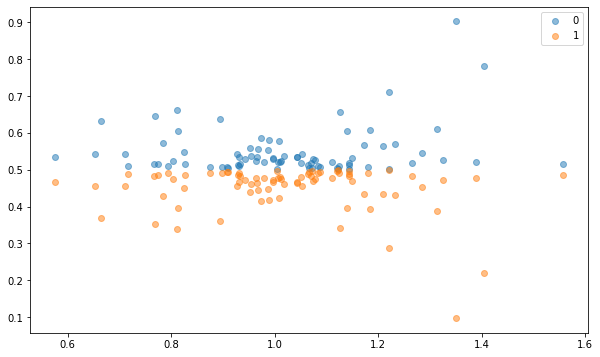

In [54]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()